In [1]:
import os
import pandas as pd
from string import punctuation
from nltk.corpus import reuters, stopwords
import string
%matplotlib inline

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Read your api key environment variable
from newsapi import NewsApiClient
api_key = os.getenv("NEWS_API_KEY")

In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
bitcoin_news_en = newsapi.get_everything(q="bitcoin AND Bitcoin",language="en",page_size=100,sort_by="relevancy")
# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_news_en['totalResults']}")
# Show sample article
bitcoin_news_en["articles"][0]

Total articles about Bitcoin: 4263


{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Laura Mallonee',
 'title': 'Inside the Icelandic Facility Where Bitcoin Is Mined',
 'description': "Cryptocurrency mining now uses more of the Nordic island nation's electricity than its homes.",
 'url': 'https://www.wired.com/story/iceland-bitcoin-mining-gallery/',
 'urlToImage': 'https://media.wired.com/photos/5dbc37a4c955950008b26751/191:100/w_1280,c_limit/photo_barnard_explosions_4.jpg',
 'publishedAt': '2019-11-03T15:00:00Z',
 'content': 'Less than two miles from Icelands Reykjavik airport sits a nondescript metal building as monolithic and drab as a commercial poultry barn. Theres a deafening racket inside, too, but it doesnt come from clucking chickens. Instead, tens of thousands of whirring… [+3426 chars]'}

In [6]:
# Fetch the Ethereum news articles
ethereum_news_en = newsapi.get_everything(q="ethereum AND Ethereum",language="en",page_size=100,sort_by="relevancy")
# Print total articles
print(f"Total articles about Etherum: {ethereum_news_en['totalResults']}")
# Show sample article
ethereum_news_en["articles"][0]

Total articles about Etherum: 930


{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Mike Butcher',
 'title': 'Sharding, scalability, decentralization – You name it, we’ve got it on the EC stage in Berlin',
 'description': 'Sharding and scalability. Transactions per second. Crypto-ecosystems. The decentralized web. These are the voyages of the Starship Blockchain, on it’s 5-year mission to seek out… Ok, you get the drift! But as you can tell, there remain many, many issues to te…',
 'url': 'http://techcrunch.com/2019/11/20/sharding-scalability-decentralization-you-name-it-weve-got-it-on-the-ec-stage-in-berlin/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2019/11/drake-egan-tyler.jpg?w=711',
 'publishedAt': '2019-11-20T14:24:38Z',
 'content': 'Sharding and scalability. Transactions per second.\xa0\xa0Crypto-ecosystems. The\xa0decentralized web. These are the\xa0voyages of the Starship Blockchain, on its 5-year mission to seek out Ok, you get the drift! But as you can tell,\xa0there remain 

In [7]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news_en["articles"]:
    try:
        text = article["content"].lower()
        title = article["title"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "Text": text,
            "Date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Title Bitcoin": title,
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["Compound","Negative","Neutral","Positive","Title Bitcoin","Text","Date"]
bitcoin_df = bitcoin_df[cols]
#bitcoin_df.sort_values(by='Negative',ascending=False,inplace=True)
bitcoin_df.head()

,Compound,Negative,Neutral,Positive,Title Bitcoin,Text,Date
0,-0.1531,0.039,0.961,0.000,Inside the Icelandic Facility Where Bitcoin Is...,less than two miles from icelands reykjavik ai...,2019-11-03
1,0.2999,0.100,0.796,0.104,Bitcoin's Carbon Footprint May Not Be As Massi...,"whether bitcoin, an immaterial resource derive...",2019-11-20
2,0.0000,0.000,1.000,0.000,French Students Will Now Have to Learn About B...,high school students in france may be among th...,2019-11-01
3,0.8555,0.037,0.724,0.239,Price of Bitcoin Plummets Below 'Psychological...,"as well as the may bitcoin halving, which will...",2019-11-25
4,0.5070,0.000,0.933,0.067,Satoshi Nakaboto: ‘Bitcoin futures trading on ...,our robot colleague satoshi nakaboto writes ab...,2019-11-08


In [8]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news_en["articles"]:
    try:
        text = article["content"].lower()
        title = article["title"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "Text": text,
            "Title Ehterum": title,
            "Date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Title Ethereum": title,
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["Compound","Negative","Neutral","Positive","Title Ethereum","Text","Date"]
ethereum_df = ethereum_df[cols]
#bitcoin_df.sort_values(by='Negative',ascending=False,inplace=True)

ethereum_df.head(3)

,Compound,Negative,Neutral,Positive,Title Ethereum,Text,Date
0,0.2244,0.000,0.958,0.042,"Sharding, scalability, decentralization – You ...",sharding and scalability. transactions per sec...,2019-11-20
1,-0.7096,0.159,0.796,0.044,Hackers steal $48.7M in Ethereum from South Ko...,south korean cryptocurrency exchange upbit has...,2019-11-27
2,0.6249,0.000,0.900,0.100,Announcing the complete Disrupt Berlin agenda!,disrupt berlin is right around the corner. and...,2019-11-26


In [9]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Negative,Neutral,Positive
count,96.000000,96.000000,96.000000,96.000000
mean,0.108883,0.043563,0.896271,0.060187
std,0.450928,0.057858,0.079482,0.054208
min,-0.831600,0.000000,0.640000,0.000000
25%,-0.115300,0.000000,0.845750,0.000000
50%,0.096350,0.012500,0.917000,0.064500
75%,0.507000,0.071500,0.947250,0.081750
max,0.855500,0.271000,1.000000,0.239000


In [10]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Negative,Neutral,Positive
count,96.000000,96.000000,96.000000,96.000000
mean,0.098266,0.040698,0.901188,0.058104
std,0.426518,0.052839,0.076373,0.055880
min,-0.812600,0.000000,0.551000,0.000000
25%,-0.299225,0.000000,0.873250,0.000000
50%,0.128000,0.000000,0.916000,0.057000
75%,0.421500,0.066750,0.948000,0.100000
max,0.855500,0.243000,1.000000,0.239000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
sw_addon = {'fucking', 'damn','char','much','ha'}

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer() 
    lem = [lemmatizer.lemmatize(word) for word in words]
    #convert to lower and remove the stopwords 
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    
    return tokens

In [14]:
# Create a new tokens column for bitcoin
bitcoin_tokens = bitcoin_df.copy()

In [15]:
tokenized = []
for i in bitcoin_tokens['Text']:
    tokenized_articles = tokenizer(i)
    tokenized.append({'tokens':tokenized_articles})

In [16]:
tokens_df= pd.DataFrame(tokenized)
bitcoin_tokens['tokens_text'] = tokens_df

In [17]:
tokenized = []
for i in bitcoin_tokens['Title Bitcoin']:
    tokenized_articles = tokenizer(i)
    tokenized.append({'tokens title':tokenized_articles})

In [18]:
tokens_df= pd.DataFrame(tokenized)
bitcoin_tokens['tokens_title'] = tokens_df

In [19]:
# Create a new tokens column for ethereum
bitcoin_tokens.head()

,Compound,Negative,Neutral,Positive,Title Bitcoin,Text,Date,tokens_text,tokens_title
0,-0.1531,0.039,0.961,0.000,Inside the Icelandic Facility Where Bitcoin Is...,less than two miles from icelands reykjavik ai...,2019-11-03,"[le, two, mile, iceland, reykjavik, airport, s...","[inside, icelandic, facility, bitcoin, mined]"
1,0.2999,0.100,0.796,0.104,Bitcoin's Carbon Footprint May Not Be As Massi...,"whether bitcoin, an immaterial resource derive...",2019-11-20,"[whether, bitcoin, immaterial, resource, deriv...","[bitcoins, carbon, footprint, may, massive, pr..."
2,0.0000,0.000,1.000,0.000,French Students Will Now Have to Learn About B...,high school students in france may be among th...,2019-11-01,"[high, school, student, france, may, among, fi...","[french, students, learn, bitcoin]"
3,0.8555,0.037,0.724,0.239,Price of Bitcoin Plummets Below 'Psychological...,"as well as the may bitcoin halving, which will...",2019-11-25,"[well, may, bitcoin, halving, see, number, bit...","[price, bitcoin, plummets, psychological, leve..."
4,0.5070,0.000,0.933,0.067,Satoshi Nakaboto: ‘Bitcoin futures trading on ...,our robot colleague satoshi nakaboto writes ab...,2019-11-08,"[robot, colleague, satoshi, nakaboto, writes, ...","[satoshi, nakaboto, bitcoin, future, trading, ..."


In [20]:
ethereum_tokens = ethereum_df.copy()

In [21]:
tokenized_eth = []
for i in ethereum_tokens['Text']:
    tokenized_articles = tokenizer(i)
    tokenized_eth.append({'tokens_text':tokenized_articles})

In [22]:
tokens_df_eth = pd.DataFrame(tokenized_eth)
ethereum_tokens['tokens_text'] = tokens_df_eth

In [23]:
tokenized_eth = []
for i in ethereum_tokens['Title Ethereum']:
    tokenized_articles = tokenizer(i)
    tokenized_eth.append({'tokens_title':tokenized_articles})

In [24]:
tokens_df_eth = pd.DataFrame(tokenized_eth)
ethereum_tokens['tokens_title'] = tokens_df_eth

In [25]:
ethereum_tokens.head()

,Compound,Negative,Neutral,Positive,Title Ethereum,Text,Date,tokens_text,tokens_title
0,0.2244,0.000,0.958,0.042,"Sharding, scalability, decentralization – You ...",sharding and scalability. transactions per sec...,2019-11-20,"[sharding, scalability, transaction, per, seco...","[sharding, scalability, decentralization, name..."
1,-0.7096,0.159,0.796,0.044,Hackers steal $48.7M in Ethereum from South Ko...,south korean cryptocurrency exchange upbit has...,2019-11-27,"[south, korean, cryptocurrency, exchange, upbi...","[hackers, steal, ethereum, south, korean, cryp..."
2,0.6249,0.000,0.900,0.100,Announcing the complete Disrupt Berlin agenda!,disrupt berlin is right around the corner. and...,2019-11-26,"[disrupt, berlin, right, around, corner, plent...","[announcing, complete, disrupt, berlin, agenda]"
3,-0.0418,0.086,0.835,0.079,Manhattan Attorney Announces Arrest Of United ...,the fine print: the following comments are own...,2019-11-29,"[fine, print, following, comment, owned, whoev...","[manhattan, attorney, announces, arrest, unite..."
4,-0.3089,0.055,0.945,0.000,A Comprehensive Guide to Top Blockchain Platforms,blockchain has been picking up the pace since ...,2019-11-01,"[blockchain, picking, pace, since, inception, ...","[comprehensive, guide, top, blockchain, platfo..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [26]:
from collections import Counter
from nltk import ngrams

In [27]:
# Generate the Bitcoin N-grams where N=2
all_bitcoin_words = []
for text in bitcoin_tokens['tokens_text']:
    for word in text:
        all_bitcoin_words.append(word)

In [28]:
all_eth_words = []
for text in ethereum_tokens['tokens_text']:
    for word in text:
        all_eth_words.append(word)

In [29]:
# Generate the Ethereum N-grams where N=2

In [30]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [31]:
# Get the top 10 words for Bitcoin

In [32]:
# Get the top 10 words for Ethereum

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [34]:
# Generate the Bitcoin word cloud
def processed_text(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    return big_string

In [35]:
bitcoin_words = processed_text(all_bitcoin_words)
eth_words = processed_text(all_eth_words)

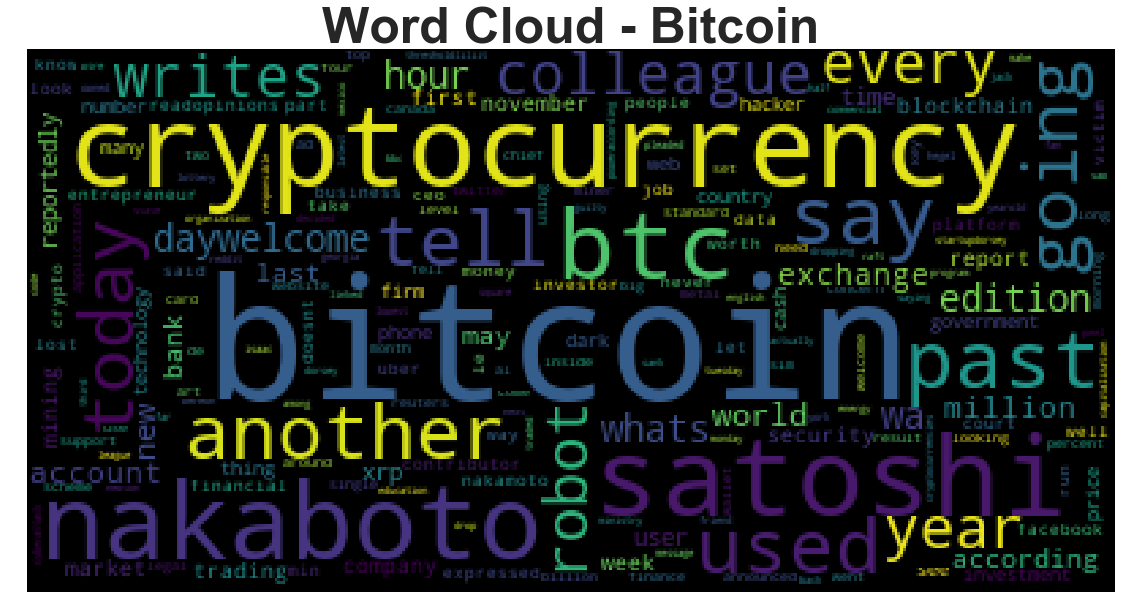

In [36]:
wc = WordCloud(collocations=False).generate(bitcoin_words)
fig = plt.figure()
plt.imshow(wc)
plt.title('Word Cloud - Bitcoin', fontsize=50, fontweight='bold')
plt.axis('off')
plt.show()

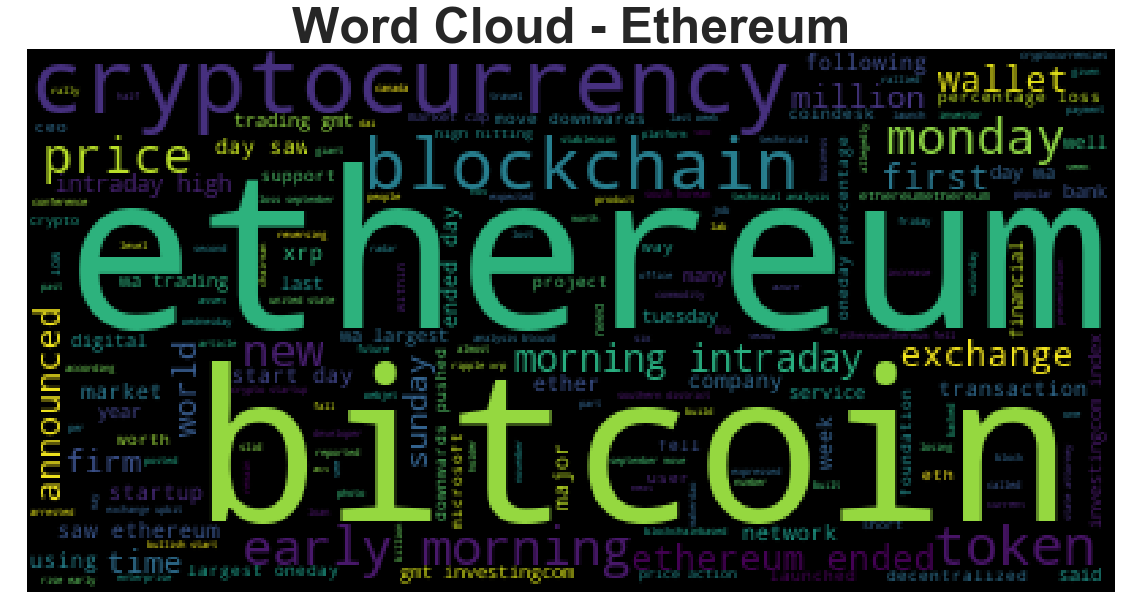

In [37]:
# Generate the Ethereum word cloud
fig = plt.figure()
wc = WordCloud().generate(eth_words)
plt.imshow(wc)
plt.title('Word Cloud - Ethereum', fontsize=50, fontweight='bold')
plt.axis('off')
plt.show()

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [38]:
import spacy
from spacy import displacy

In [39]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [40]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [43]:
# Concatenate all of the bitcoin text together
bitcoin_sent = []
for sent in bitcoin_tokens['Text']:
    sent_list = sent
    bitcoin_sent.append(sent_list)
    
one_string_bitcoin = ' '.join(bitcoin_sent)
one_string_bitcoin

'less than two miles from icelands reykjavik airport sits a nondescript metal building as monolithic and drab as a commercial poultry barn. theres a deafening racket inside, too, but it doesnt come from clucking chickens. instead, tens of thousands of whirring… [+3426 chars] whether bitcoin, an immaterial resource derived from hype and blind faith, will vanish into thin air is uncertain, but it will leave behind a dark cloud of carbon pollution. cryptocurrency mining facilities use so much energy that the government of abkhazia c… [+3402 chars] high school students in france may be among the first people in the world to actually understand how cryptocurrency works. \r\nthe next web reports that the french education ministry, le ministère de léducation nationale, will integrate cryptocurrency into its … [+1439 chars] as well as the may bitcoin halving, which will see the number of bitcoin rewarded to miners cut by half from 12.5 bitcoin to 6.25 bitcoin, bitcoin investors are hopeful nex

In [50]:
# Run the NER processor on all of the text
# Add a title to the document
# Render the visualization
bitcoin_doc = nlp(one_string_bitcoin)
bitcoin_doc.user_data['title'] = 'Bitcoin NER'
displacy.render(bitcoin_doc, style='ent')

In [51]:
# List all Entities
for ent in bitcoin_doc.ents:
    print (ent, ent.label_)

less than two miles QUANTITY
reykjavik airport FAC
drab GPE
tens of thousands CARDINAL
france GPE
first ORDINAL
the french education ministry ORG
le ministère de léducation nationale ORG
half CARDINAL
12.5 CARDINAL
6.25 CARDINAL
next year DATE
satoshi nakaboto PERSON
today DATE
satoshi nakaboto PERSON
the past 24 hours TIME
isaac newton PERSON
satoshi nakaboto PERSON
today DATE
satoshi nakaboto PERSON
the past 24 hours TIME
satoshi nakaboto PERSON
today DATE
satoshi nakaboto PERSON
the past 24 hours TIME
+2682 GPE
satoshi nakaboto PERSON
today DATE
satoshi nakaboto PERSON
the past 24 hours TIME
satoshi nakaboto PERSON
today DATE
satoshi nakaboto PERSON
the past 24 hours TIME
isaac newton PERSON
jack dorsey PERSON
ghana GPE
just weeks DATE
africa LOC
nigeria GPE
ghana GPE
bitcoin g PERSON
+1911 ORDINAL
satoshi nakaboto PERSON
today DATE
satoshi nakaboto PERSON
the past 24 hours TIME
satoshi nakaboto PERSON
today DATE
satoshi nakaboto PERSON
the past 24 hours TIME
satoshi nakaboto PERSON

---

## Ethereum NER

In [52]:
# Concatenate all of the bitcoin text together
eth_sent = []
for sent in ethereum_tokens['Text']:
    sent_list_eth = sent
    eth_sent.append(sent_list_eth)
    
one_string_eth = " ".join(eth_sent)
one_string_eth

'sharding and scalability. transactions per second.\xa0\xa0crypto-ecosystems. the\xa0decentralized web. these are the\xa0voyages of the starship blockchain, on its 5-year mission to seek out ok, you get the drift! but as you can tell,\xa0there remain many, many issues to tea… [+3851 chars] south korean cryptocurrency exchange upbit has reported that hackers have ransacked its ethereum eth hot wallet, stealing 342,000 eth\xa0 a cryptocurrency stash worth $48.7 million.\r\nthe attack was confirmed in a statement posted to the cryptocurrency exchanges … [+1142 chars] disrupt berlin is right around the corner. and there is plenty to look forward to.\r\njoin us december 11 and december 12 to hear from industry leaders, investors and bright stars in the startup world. we’ll sit down with ceos from big-name companies such as ui… [+17169 chars] the fine print: the following comments are owned by whoever posted them. we are not responsible for them in any way. blockchain has been picking up the

In [53]:
# Run the NER processor on all of the text
# Render the visualization
# Add a title to the document
eth_doc = nlp(one_string_eth)
eth_doc.user_data['title'] = 'Ethereum NER'
displacy.render(eth_doc, style='ent')

In [54]:
# List all Entities
for ent in eth_doc.ents:
    print (ent, ent.label_)

second ORDINAL
south korean NORP
342,000 eth   CARDINAL
$48.7 million MONEY
december 11 and december 12 DATE
the year 2009 DATE
nakamoto PERSON
blockchai GPE
swiss NORP
countrys NORP
swiss NORP
cryptocurrency bank ORG
$400 million MONEY
london GPE
less than 0.2 percent PERCENT
the royal bank of canada ORG
last week DATE
canadian NORP
the royal bank of canada ORG
ripple xrp PERSON
xrp PERSON
third ORDINAL
the day DATE
six CARDINAL
rainn wilson PERSON
the mona foundation ORG
$7,000 mark MONEY
sunday DATE
first ORDINAL
may DATE
-4.45% PERCENT
around $6,850 MONEY
about 24% PERCENT
the past month DATE
june DATE
9,000 MONEY
just $29 MONEY
first ORDINAL
last year DATE
chinese NORP
countrys NORP
november
20, DATE
4 CARDINAL
tuesday DATE
eight CARDINAL
israel GPE
the tel aviv district court GPE
tussle PERSON
british columbia GPE
canada GPE
more than cad$16 million CARDINAL
+2554 ORG
second ORDINAL
justin drake ORG
jinglan wang PERSON
2014 DATE
a gray morning TIME
may 2016 DATE
san francisco GPE